# Predict the next word in a sentence from Shakespeare
***
Robogarden Mission 6-1 - Use python to create an RNN that predicts the next word in a phrase from Shakespeare

### 1. Open and Read the text file containing Shakespeare poetry

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import livelossplot

In [2]:
with open('shakespeare.txt', 'r') as file: 
    text = file.read() 
    lines = text.lower().split('\n')

In [3]:
print(text[0:200])

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own 


In [4]:
lines

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou contracted to thine own bright eyes,',
 "feed'st thy light's flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thy self thy foe, to thy sweet self too cruel:',
 "thou that art now the world's fresh ornament,",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content,',
 "and, tender churl, mak'st waste in niggarding:",
 '   pity the world, or else this glutton be,',
 "   to eat the world's due, by the grave and thee.",
 'when forty winters shall besiege thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery so gazed on now,",
 'will be a tattered weed of small worth held:',
 'then being asked, where all thy beauty lies,',
 'where all the treasure of thy lusty days;',
 'to say, within thine own deep sunken e

### 2. Break the lines down into single words stored in an array 

In [5]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
words= text_to_word_sequence(text)

Using TensorFlow backend.


In [6]:
words

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 "beauty's",
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 "feed'st",
 'thy',
 "light's",
 'flame',
 'with',
 'self',
 'substantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 "world's",
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 "mak'st",
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'to',
 'eat',
 'the',
 "world's",
 'due',
 'by',
 'the',
 'grav

### 3. Create tokens for each word, i.e. assign it a spot in an array
The number of words in the file is the length of the tokenied words disctionary (+1 for the 0 start in Python)
The sequences function creates a string representing the order of the words as they appear in the poem stacked together.
This tool seems to order the words by frequency with the most common words occuring in the lowest keys of the dictionary

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
vocabulary_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(lines)
tokens = tokenizer.word_index

In [8]:
vocabulary_size

581

In [9]:
sequences

[[26, 189, 190, 191, 97, 98],
 [6, 99, 27, 192, 100, 101, 43],
 [18, 34, 2, 193, 57, 35, 36, 194],
 [14, 102, 103, 100, 104, 14, 195],
 [18, 1, 196, 5, 15, 66, 197, 58],
 [198, 3, 199, 200, 12, 10, 201, 202],
 [203, 28, 204, 37, 205, 105],
 [3, 10, 3, 206, 5, 3, 44, 10, 106, 207],
 [1, 6, 23, 45, 2, 107, 67, 208],
 [4, 209, 210, 5, 2, 211, 212],
 [108, 15, 66, 213, 214, 3, 215],
 [4, 102, 216, 217, 109, 7, 218],
 [219, 2, 24, 38, 110, 46, 220, 11],
 [5, 221, 2, 107, 222, 35, 2, 223, 4, 9],
 [16, 224, 225, 68, 226, 3, 227],
 [4, 228, 111, 229, 7, 3, 27, 230],
 [3, 231, 232, 233, 19, 234, 39, 45],
 [47, 11, 28, 235, 236, 8, 237, 238, 239],
 [29, 69, 240, 37, 30, 3, 20, 105],
 [37, 30, 2, 70, 8, 3, 112, 241],
 [5, 242, 108, 15, 66, 111, 243, 58],
 [40, 71, 30, 244, 72, 4, 245, 113],
 [73, 114, 74, 113, 246, 3, 27, 75],
 [21, 1, 247, 248, 14, 76, 115, 8, 249],
 [68, 116, 77, 117, 4, 31, 77, 118, 250, 251],
 [252, 14, 20, 35, 253, 15],
 [46, 40, 5, 11, 119, 120, 16, 1, 23, 118],
 [4, 48, 3,

Can use this dictionary call to display specific words in the dictionary at specific locations

In [10]:
_list=[580,581,582]
for k, v in tokens.items():    
    if v in _list:
        print(v,k)

580 hence


Find the location of specific words in the dictionary

In [11]:
_list=['trees','thou']
for k, v in tokens.items():    
    if k in _list:
        print(k,v)

thou 1
trees 552


Now create ordered sequences of the words for prediction

In [12]:
subsequences = []

for sequence in sequences:
    for i in range(1, len(sequence)):
        subsequence = sequence[:i+1]
        subsequences.append(subsequence)

In [13]:
#visualize the new set-up
subsequences

[[26, 189],
 [26, 189, 190],
 [26, 189, 190, 191],
 [26, 189, 190, 191, 97],
 [26, 189, 190, 191, 97, 98],
 [6, 99],
 [6, 99, 27],
 [6, 99, 27, 192],
 [6, 99, 27, 192, 100],
 [6, 99, 27, 192, 100, 101],
 [6, 99, 27, 192, 100, 101, 43],
 [18, 34],
 [18, 34, 2],
 [18, 34, 2, 193],
 [18, 34, 2, 193, 57],
 [18, 34, 2, 193, 57, 35],
 [18, 34, 2, 193, 57, 35, 36],
 [18, 34, 2, 193, 57, 35, 36, 194],
 [14, 102],
 [14, 102, 103],
 [14, 102, 103, 100],
 [14, 102, 103, 100, 104],
 [14, 102, 103, 100, 104, 14],
 [14, 102, 103, 100, 104, 14, 195],
 [18, 1],
 [18, 1, 196],
 [18, 1, 196, 5],
 [18, 1, 196, 5, 15],
 [18, 1, 196, 5, 15, 66],
 [18, 1, 196, 5, 15, 66, 197],
 [18, 1, 196, 5, 15, 66, 197, 58],
 [198, 3],
 [198, 3, 199],
 [198, 3, 199, 200],
 [198, 3, 199, 200, 12],
 [198, 3, 199, 200, 12, 10],
 [198, 3, 199, 200, 12, 10, 201],
 [198, 3, 199, 200, 12, 10, 201, 202],
 [203, 28],
 [203, 28, 204],
 [203, 28, 204, 37],
 [203, 28, 204, 37, 205],
 [203, 28, 204, 37, 205, 105],
 [3, 10],
 [3, 10, 

In [14]:
#l Look at the 5th line in the dataset
subsequences[4]

[26, 189, 190, 191, 97, 98]

### 4. Add a padding layer around the sequences so we don't loose the first words

In [15]:
from keras.preprocessing.sequence import pad_sequences

sequence_length = max([len(sequence) for sequence in sequences])
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')

The phrases are all right justified and padded with leading zeros

In [16]:
print(sequences[0:18])

[[  0   0   0   0   0   0   0   0  26 189]
 [  0   0   0   0   0   0   0  26 189 190]
 [  0   0   0   0   0   0  26 189 190 191]
 [  0   0   0   0   0  26 189 190 191  97]
 [  0   0   0   0  26 189 190 191  97  98]
 [  0   0   0   0   0   0   0   0   6  99]
 [  0   0   0   0   0   0   0   6  99  27]
 [  0   0   0   0   0   0   6  99  27 192]
 [  0   0   0   0   0   6  99  27 192 100]
 [  0   0   0   0   6  99  27 192 100 101]
 [  0   0   0   6  99  27 192 100 101  43]
 [  0   0   0   0   0   0   0   0  18  34]
 [  0   0   0   0   0   0   0  18  34   2]
 [  0   0   0   0   0   0  18  34   2 193]
 [  0   0   0   0   0  18  34   2 193  57]
 [  0   0   0   0  18  34   2 193  57  35]
 [  0   0   0  18  34   2 193  57  35  36]
 [  0   0  18  34   2 193  57  35  36 194]]


In [17]:
sequences.shape

(1177, 10)

### 5. Split the lines of words into input and output.  

The last word of each line is now the fartherst right word on each line because of all the padding zeros pushing it over the appropriate number of spots. You can grab the output now, because the next word in the line is always in the last column. Cool!

In [18]:
from keras.utils import to_categorical

x, y = sequences[:,:-1],sequences[:,-1]


In [19]:
print(x[0:18])

[[  0   0   0   0   0   0   0   0  26]
 [  0   0   0   0   0   0   0  26 189]
 [  0   0   0   0   0   0  26 189 190]
 [  0   0   0   0   0  26 189 190 191]
 [  0   0   0   0  26 189 190 191  97]
 [  0   0   0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   0   6  99]
 [  0   0   0   0   0   0   6  99  27]
 [  0   0   0   0   0   6  99  27 192]
 [  0   0   0   0   6  99  27 192 100]
 [  0   0   0   6  99  27 192 100 101]
 [  0   0   0   0   0   0   0   0  18]
 [  0   0   0   0   0   0   0  18  34]
 [  0   0   0   0   0   0  18  34   2]
 [  0   0   0   0   0  18  34   2 193]
 [  0   0   0   0  18  34   2 193  57]
 [  0   0   0  18  34   2 193  57  35]
 [  0   0  18  34   2 193  57  35  36]]


In [20]:
print(x.shape,y.shape)

(1177, 9) (1177,)


In [21]:
print(y)

[189 190 191 ... 579   9 580]


### Step 6: Pivot the output column into columns (dummie columns of either 0 or 1)

In [22]:
y = to_categorical(y, num_classes=vocabulary_size)

In [23]:
y.shape

(1177, 581)

Data transformation is now complete.

## 7. Create the RNN to predict the next word

Define an RNN with the following layers:

An embedding layer with the following parameters:
<br> The input dimension is vocabulary_size
<br> The output dimension is 100
<br> The input length is sequence_length - 1
<br> An LSTM layer with 100 units
<br> A dropout layer with a dropout rate of 10%
<br> A dense layer with the following parameters:
<br> The activation function is softmax
<br> The number of units is vocabulary_size

In [24]:
from keras.models import Sequential 
model = Sequential()

In [25]:
from keras.layers import Embedding
model.add(Embedding(input_dim = vocabulary_size, 
                    output_dim = 100,
                    input_length = sequence_length - 1)) # input_dim

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
from keras.layers import LSTM 
model.add(LSTM(units = 100))

In [27]:
from keras.layers import Dropout, Dense 
model.add(Dropout(rate=1-0.9))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
#The output layer is the size of the vocabulary as it will present 
# a probability for each word of it being the next word in the string.
model.add(Dense(units=vocabulary_size, activation ='softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 9, 100)            58100     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 581)               58681     
Total params: 197,181
Trainable params: 197,181
Non-trainable params: 0
_________________________________________________________________


## 8. Compile the network
Build the network using:
- An adam optimizer
- The loss function is categorical_crossentropy
- The metric used is accuracy

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
plot_loss_RNN = livelossplot.PlotLossesKeras()

## 9. Fit the model

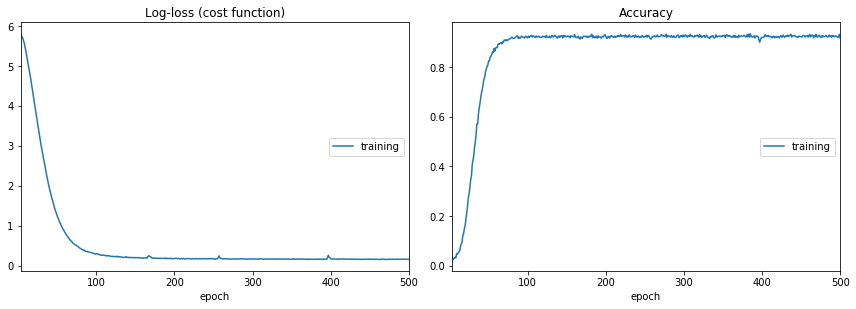

Log-loss (cost function):
training   (min:    0.152, max:    6.311, cur:    0.160)

Accuracy:
training   (min:    0.022, max:    0.935, cur:    0.918)


In [32]:
model.fit(x, y,
          callbacks = [plot_loss_RNN],
          epochs = 500) # Less epochs - Basic Model

## The model predicts the next word with a max 93.5% accuracy.  
